# Evolving Boid Parameters Using Sequential ABC

This notebook demonstrates the use of the Approximate Bayesian Computation (ABC) sequential algorithm to optimize parameters for the Boid model, aiming to achieve a specified level of alignment within a swarm.

## Objectives
- To implement the ABC sequential algorithm for parameter optimization.
- To find optimal parameters that yield desired behavior in the Boid simulation.
- To analyze the evolution of parameters and their effect on swarm alignment.

## Setup

### Importing Necessary Libraries

In [ ]:
import random
import subprocess

import matplotlib.pyplot as plt
import numpy as np

### Initializing Parameters

Here, we set the initial conditions for our ABC algorithm, including the generation count, epsilon vector, and the parameter ranges for cohesion, separation, and alignment.

In [8]:
generations = 20
epsilon_vector = np.zeros(generations)
N = 20

# Generating epsilon vector
epsilon_vector = [1 / (k * 2) for k in range(1, 21)]

# Generating covariance matrix
covariance_matrix = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Defining parameter ranges
cohesion_arr = np.linspace(50, 200, 50)
separation_arr = np.linspace(10, 30, 50)
alignment_arr = np.linspace(0, 10, 50)

## The ABC Sequential Function
This function implements the ABC sequential algorithm, evolving the parameters across generations to achieve the target alignment.

In [102]:
def ABC_sequential(cohesion=cohesion_arr, alignment=alignment_arr, separation=separation_arr,
                   epsilon_vector=epsilon_vector, N=30, generations=20, target=1):
    thetas = []
    thetas_per_generation = []
    alignments_per_generation = []
    i = 0
    alignments_per_set = []
    while i < N:
        theta = np.array([np.random.choice(cohesion), np.random.choice(alignment), np.random.choice(separation)])
        #print(theta)
        #run simulation in java script with parameters theta and get vector of alignments
        cmd = f'node boid_text.js {theta[0]} {theta[2]} {theta[1]}'
        output = subprocess.check_output(cmd, shell=True)
        output = output.decode('utf-8')[5:16]
        align = float(output.strip())
        #print(align)
        if np.abs(target - align) < epsilon_vector[0]:
            print(i)
            thetas.append(theta)
            alignments_per_set.append(align)
            i += 1
    thetas = np.array(thetas)
    thetas_per_generation.append(thetas)
    alignments_per_generation.append(alignments_per_set)
    for gen in range(1, generations):
        print(f"Generation {gen}")
        k = 0
        thetas_new = np.zeros_like(thetas)
        alignments_per_set = []
        while k < N:
            theta_star = np.copy(random.choice(thetas))
            sample = np.random.multivariate_normal(mean=np.zeros_like(theta_star), cov=covariance_matrix)
            theta_star += sample

            if theta_star[0] < 1 or theta_star[1] < 0 or theta_star[2] < 0:
                continue
            # run java script simulation with parameters theta_star and get alignments vector
            cmd = f'node boid_text.js {theta_star[0]} {theta_star[2]} {theta_star[1]}'
            output = subprocess.check_output(cmd, shell=True)
            output = output.decode('utf-8')[5:16]
            align = float(output.strip())
            if np.abs(target - align) < epsilon_vector[gen]:
                print(f"K {k}")
                thetas_new[k] = theta_star
                k += 1
                alignments_per_set.append(align)
        alignments_per_generation.append(alignments_per_set)
        thetas_per_generation.append(thetas_new)
        thetas = thetas_new
    return thetas_per_generation, alignments_per_generation

### Executing the ABC Sequential Algorithm

Here, we execute the ABC sequential algorithm with a target alignment of 1 and 0.6, respectively, to explore how the parameters evolve towards achieving these targets.

#### Target Alignment: 1

In [ ]:
thetas_1, alignments_1 = ABC_sequential(cohesion = cohesion_arr, alignment = alignment_arr, separation = separation_arr, epsilon_vector = epsilon_vector, N = 20, generations = 20, target = 1)

#### Target Alignment: 0.6

In [112]:
thetas_0_6, alignments_0_6 = ABC_sequential(cohesion = cohesion_arr, alignment = alignment_arr, separation = separation_arr, epsilon_vector = epsilon_vector, N = 20, generations = 20, target = 0.6)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Generation 1
K 0
K 1
K 2
K 3
K 4
K 5
K 6
K 7
K 8
K 9
K 10
K 11
K 12
K 13
K 14
K 15
K 16
K 17
K 18
K 19
Generation 2
K 0
K 1
K 2
K 3
K 4
K 5
K 6
K 7
K 8
K 9
K 10
K 11
K 12
K 13
K 14
K 15
K 16
K 17
K 18
K 19
Generation 3
K 0
K 1
K 2
K 3
K 4
K 5
K 6
K 7
K 8
K 9
K 10
K 11
K 12
K 13
K 14
K 15
K 16
K 17
K 18
K 19
Generation 4
K 0
K 1
K 2
K 3
K 4
K 5
K 6
K 7
K 8
K 9
K 10
K 11
K 12
K 13
K 14
K 15
K 16
K 17
K 18
K 19
Generation 5
K 0
K 1
K 2
K 3
K 4
K 5
K 6
K 7
K 8
K 9
K 10
K 11
K 12
K 13
K 14
K 15
K 16
K 17
K 18
K 19
Generation 6
K 0
K 1
K 2
K 3
K 4
K 5
K 6
K 7
K 8
K 9
K 10
K 11
K 12
K 13
K 14
K 15
K 16
K 17
K 18
K 19
Generation 7
K 0
K 1
K 2
K 3
K 4
K 5
K 6
K 7
K 8
K 9
K 10
K 11
K 12
K 13
K 14
K 15
K 16
K 17
K 18
K 19
Generation 8
K 0
K 1
K 2
K 3
K 4
K 5
K 6
K 7
K 8
K 9
K 10
K 11
K 12
K 13
K 14
K 15
K 16
K 17
K 18
K 19
Generation 9
K 0
K 1
K 2
K 3
K 4
K 5
K 6
K 7
K 8
K 9
K 10
K 11
K 12
K 13
K 14
K 15
K 16
K 17
K 18
K 19
Generation 10
K 0
K 1
K

## Analysis and Visualization
### Visualizing the Distribution of Parameters
We visualize the distribution of parameters at selected generations to observe how the algorithm explores the parameter space.
#### Target Alignment: 1

In [134]:
np.min(thetas_1[-1][:,2])

8.327019598124929

In [101]:
np.mean(thetas_1[-1], axis = 0)

array([110.35801427,   1.04917732,  12.93872315])

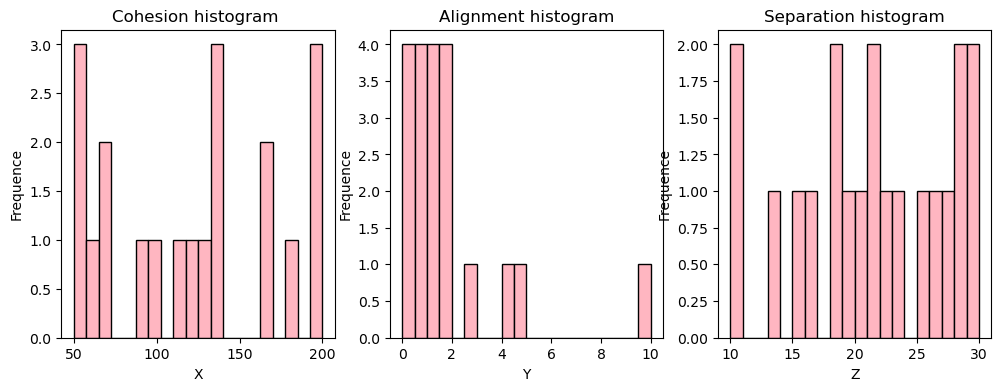

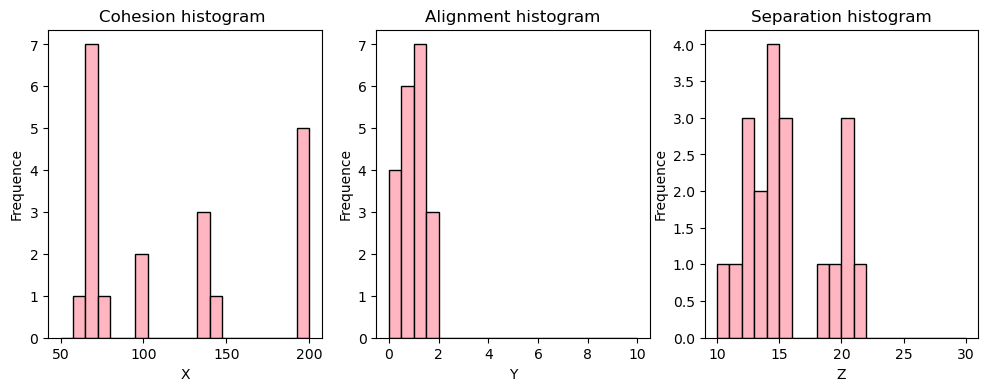

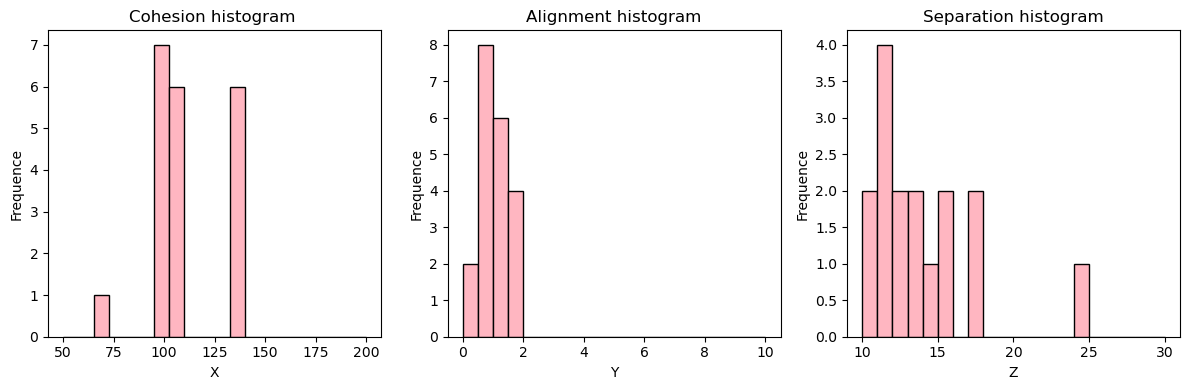

In [93]:
data_1 = thetas_1[0]
data_10 = thetas_1[9]
data_20 = thetas_1[-1]
dataset = [data_1, data_10, data_20]

color_pastel = '#FFB6C1'

num_bins = 20  # Number of intervals
for i, data in enumerate(dataset):
    plt.figure(figsize=(12, 4))

    # Histogram for first column (x)
    plt.subplot(1, 3, 1)
    plt.hist(data[:, 0], bins=num_bins, range=(50, 200), color=color_pastel, edgecolor='black')
    plt.xlabel('X')
    plt.ylabel('Frequence')
    plt.title('Cohesion histogram ')

    # Histogram for second column (y)
    plt.subplot(1, 3, 2)
    plt.hist(data[:, 1], bins=num_bins, range=(0, 10), color=color_pastel, edgecolor='black')
    plt.xlabel('Y')
    plt.ylabel('Frequence')
    plt.title('Alignment histogram')

    # Histogram for third column (z)
    plt.subplot(1, 3, 3)
    plt.hist(data[:, 2], bins=num_bins, range=(10, 30), color=color_pastel, edgecolor='black')
    plt.xlabel('Z')
    plt.ylabel('Frequence')
    plt.title('Separation histogram')

plt.tight_layout()
plt.show()

#### Target Alignment: 0.6

In [113]:
thetas_0_6[-1]

array([[1.63740856e+02, 9.35694864e-01, 3.60067713e+01],
       [1.65818397e+02, 1.32570918e+00, 3.24017341e+01],
       [1.61947297e+02, 1.00382286e-02, 2.97368741e+01],
       [1.62645935e+02, 5.78293960e-01, 3.11874788e+01],
       [1.66846458e+02, 1.82195467e+00, 3.39651603e+01],
       [1.61001869e+02, 7.45087851e-01, 2.71860134e+01],
       [1.55202271e+02, 6.48818750e-01, 3.36315454e+01],
       [1.59299308e+02, 9.17468370e-01, 3.36987862e+01],
       [1.66052882e+02, 3.79597754e-01, 3.49027821e+01],
       [1.58697688e+02, 1.69688515e+00, 2.62497898e+01],
       [1.60573836e+02, 7.05340713e-01, 3.20578322e+01],
       [1.61599909e+02, 3.13183048e-01, 2.94190807e+01],
       [1.64728296e+02, 3.06404239e-01, 3.80990220e+01],
       [1.57730647e+02, 5.63527308e-01, 3.32073147e+01],
       [1.59894933e+02, 3.29902269e-01, 3.14963874e+01],
       [1.60722995e+02, 1.35865728e+00, 3.04654759e+01],
       [1.63095527e+02, 9.10424971e-01, 3.77083404e+01],
       [1.55849649e+02, 1.12557

In [114]:
np.mean(thetas_0_6[-1], axis = 0)

array([161.14437162,   0.82510633,  32.47944182])

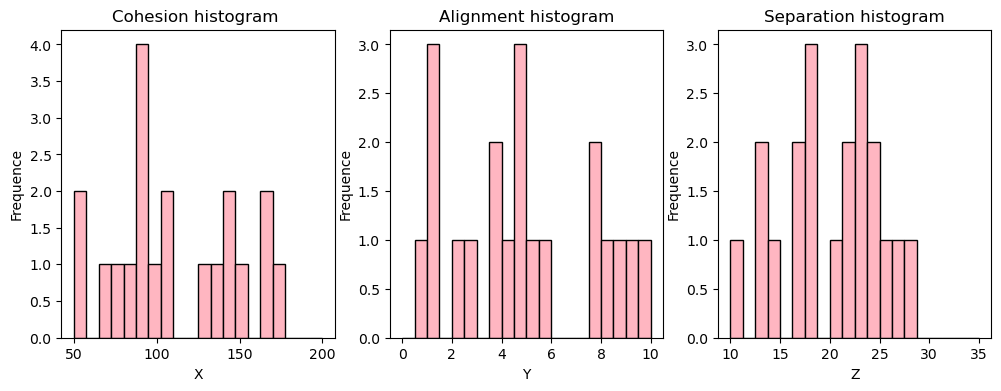

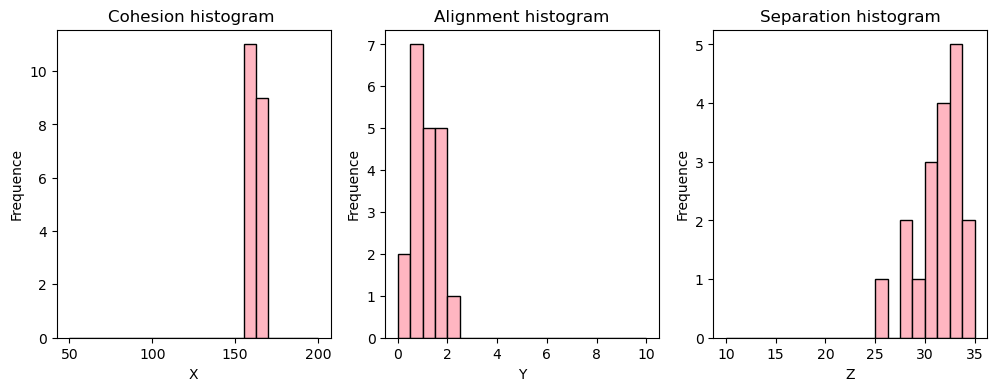

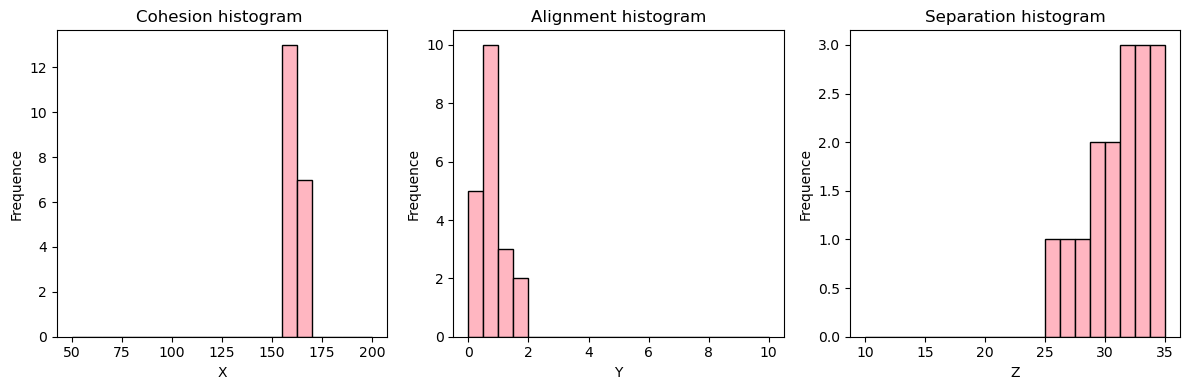

In [118]:
data_1 = thetas_0_6[0]
data_5 = thetas_0_6[5]
data_10 = thetas_0_6[-1]
dataset = [data_1, data_5, data_10]

color_pastel = '#FFB6C1'

num_bins = 20  # Number of intervals
for i, data in enumerate(dataset):
    plt.figure(figsize=(12, 4))

    # Histogram for first column (x)
    plt.subplot(1, 3, 1)
    plt.hist(data[:, 0], bins=num_bins, range=(50, 200), color=color_pastel, edgecolor='black')
    plt.xlabel('X')
    plt.ylabel('Frequence')
    plt.title('Cohesion histogram ')

    # Histogram for second column (y)
    plt.subplot(1, 3, 2)
    plt.hist(data[:, 1], bins=num_bins, range=(0, 10), color=color_pastel, edgecolor='black')
    plt.xlabel('Y')
    plt.ylabel('Frequence')
    plt.title('Alignment histogram')

    # Histogram for first column (z)
    plt.subplot(1, 3, 3)
    plt.hist(data[:, 2], bins=num_bins, range=(10, 35), color=color_pastel, edgecolor='black')
    plt.xlabel('Z')
    plt.ylabel('Frequence')
    plt.title('Separation histogram')

plt.tight_layout()
plt.show()

In [127]:
np.min(thetas_0_6[-1][:,2])

26.24978982475008

In [119]:
np.mean(thetas_0_6[-1], axis = 0)

array([161.14437162,   0.82510633,  32.47944182])

In [96]:
alignments_0_6[-1]

[0.575467193,
 0.597086835,
 0.614415233,
 0.603721989,
 0.601762478,
 0.576652145,
 0.568449089,
 0.603093819,
 0.601334909,
 0.643355102,
 0.610701912,
 0.636965208,
 0.587532051,
 0.583585672,
 0.576997502,
 0.583623968,
 0.628209487,
 0.551810174,
 0.567521467,
 0.569567116]